In [1]:
import pandas as np
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from Functions.UNSW_DF import *

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def get_max(df, colname):
    maxvalue = df.iloc[df[colname].argmax()]
    print(maxvalue)

In [43]:
df = pd.read_csv("../Random_forest/RF_mTuning.csv")
df = df.drop(["max_depth", "min_samples_split", "min_samples_leaf", "n_estimators", "runtime(s)"], axis=1)

In [44]:
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [45]:
# Creating index column and moving to first position
#df['experiment'] = range(1, len(df) + 1)
#col = df.pop("experiment")
#df.insert(0, col.name, col)

In [46]:
df = pd.melt(df, id_vars="criterion", var_name="metric", value_name="score")
df

,criterion,metric,score
0,gini,train_acc,99.816
1,gini,train_acc,99.817
2,gini,train_acc,98.625
3,gini,train_acc,99.817
4,gini,train_acc,97.095
...,...,...,...
85,entropy,recall,98.930
86,entropy,recall,98.804
87,entropy,recall,98.639
88,entropy,recall,98.630


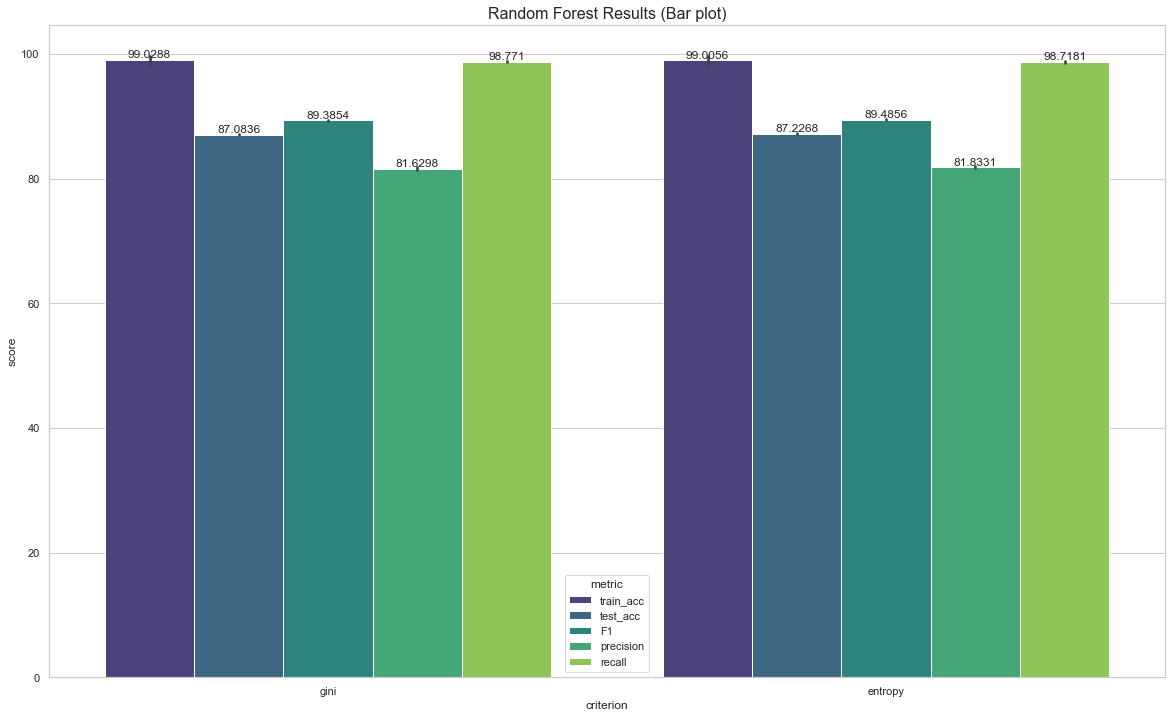

In [54]:
sns.set(rc={"figure.figsize":(20, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")
ax = sns.barplot(x='criterion', y='score', hue='metric', data=df, palette="viridis")
plt.title('Random Forest Results (Bar plot)', size=16)

for container in ax.containers:
    ax.bar_label(container)
ax.figure.savefig("Analysis_RF/RF_Results.png", dpi=400)

## Distplot

In [57]:
df_dist = pd.read_csv("../Random_forest/RF_mTuning.csv")
df_dist = df_dist.drop(["max_depth", "min_samples_split", "min_samples_leaf", "n_estimators", "runtime(s)"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_dist[col] *= 100


C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

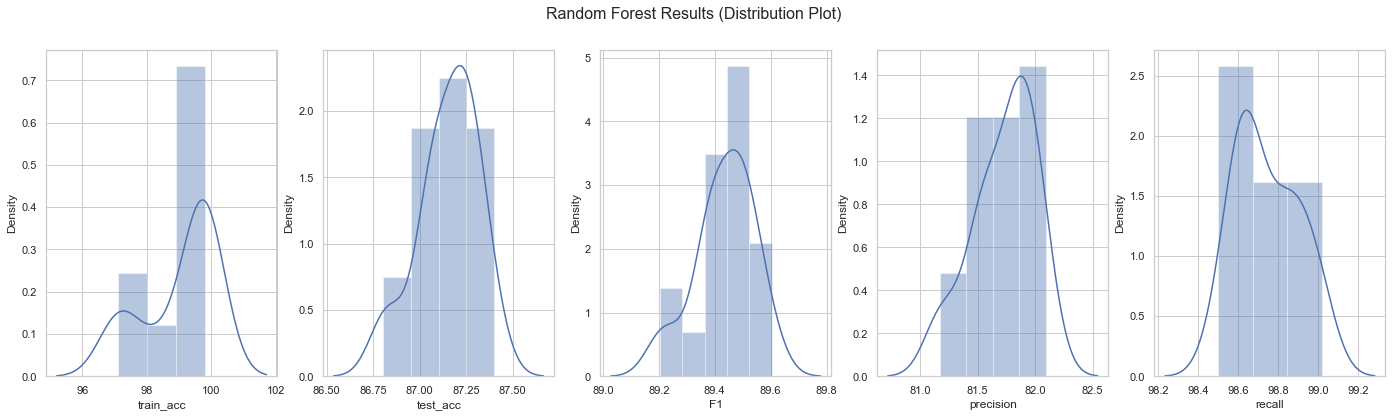

In [58]:
sns.set(rc={"figure.figsize":(24, 6), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=5, nrows=1)
ax=sns.distplot(df_dist["train_acc"], ax=axs[0])
ax=sns.distplot(df_dist['test_acc'], ax=axs[1])
ax=sns.distplot(df_dist['F1'], ax=axs[2])
ax=sns.distplot(df_dist['precision'], ax=axs[3])
ax=sns.distplot(df_dist['recall'], ax=axs[4])
fig.suptitle("Random Forest Results (Distribution Plot)", size=16)

ax.figure.savefig("Analysis_RF/RF_Distplot.png", dpi=400)

### Jointplot

In [35]:
df_reg = pd.read_csv("../Random_forest/RF_mTuning.csv")
#df_joint = df_dist.drop(["max_depth", "min_samples_split", "min_samples_leaf", "n_estimators", "runtime(s)"], axis=1)
columns = ["train_acc", "test_acc", "F1", "precision", "recall"]
for col in columns:
    df_dist[col] *= 100


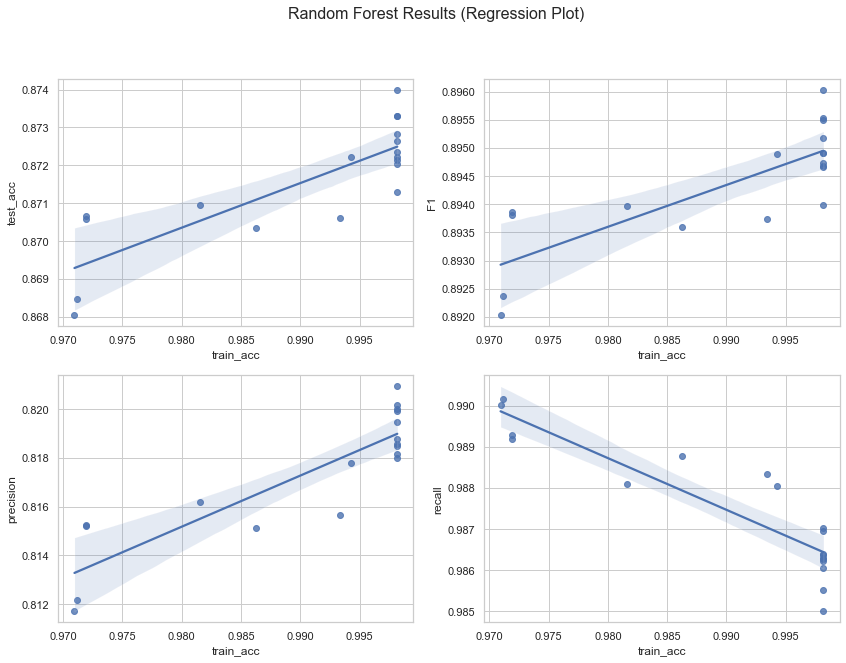

In [59]:
sns.set(rc={"figure.figsize":(14, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='train_acc', y='test_acc', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='train_acc', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='train_acc', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='train_acc', y='recall', data=df_reg, ax=axs[1, 1])

fig.suptitle("Random Forest Results (Regression Plot)", size=16)
ax.figure.savefig("Analysis_RF/RF_regplot.png", dpi=400)

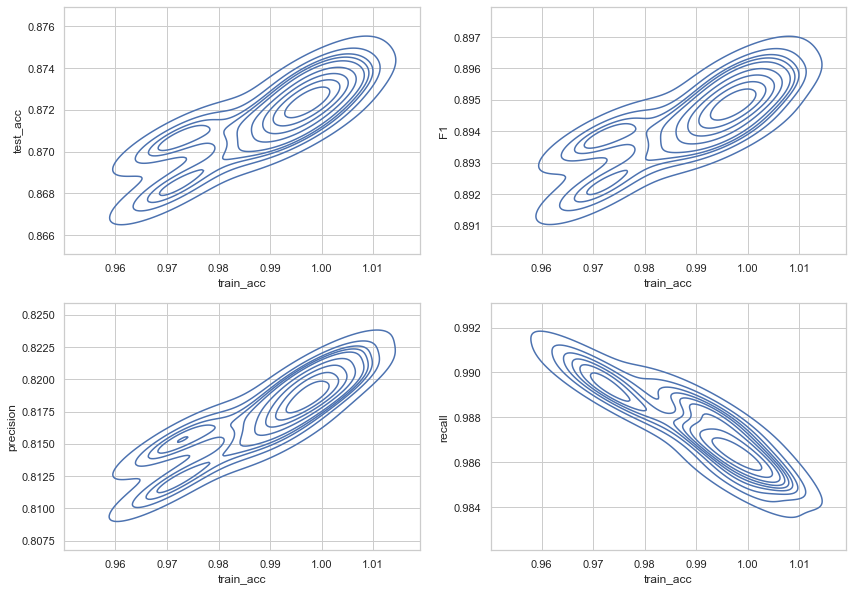

In [40]:
sns.set(rc={"figure.figsize":(14, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")


fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.kdeplot(x='train_acc', y='test_acc', data=df_reg, ax=axs[0, 0])
ax=sns.kdeplot(x='train_acc', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.kdeplot(x='train_acc', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.kdeplot(x='train_acc', y='recall', data=df_reg, ax=axs[1, 1])

ax.figure.savefig("Analysis_RF/RF_regplot.png", dpi=400)